## Title : Implementing Feed forward neural networks

### Aim: Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages

b. Load the training and testing data (MNIST/CIFAR10)

c. Define the network architecture using Keras

d. Train the model using SGD

e. Evaluate the network

f. Plot the training loss and accuracy

## Dataset
MNIST

In [1]:
import numpy as np
import pandas as pd
#import tensorflow as tf

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse

In [59]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True, help="path to the output loss/accuracy plot")
# args = vars(ap.parse_args())

In [3]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [14]:
#testX

In [18]:
#type(trainX)

numpy.ndarray

In [15]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [19]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [20]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [38]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128)

[INFO] training network...
Epoch 1/20
469/469 [==============================] - 9s 12ms/step - loss: 2.2742 - accuracy: 0.1859 - val_loss: 2.2401 - val_accuracy: 0.3001
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 2.2080 - accuracy: 0.3861 - val_loss: 2.1666 - val_accuracy: 0.5919
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 2.1225 - accuracy: 0.5235 - val_loss: 2.0627 - val_accuracy: 0.5980
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 1.9995 - accuracy: 0.5914 - val_loss: 1.9128 - val_accuracy: 0.6192
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 1.8268 - accuracy: 0.6281 - val_loss: 1.7126 - val_accuracy: 0.6794
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 1.6146 - accuracy: 0.6646 - val_loss: 1.4893 - val_accuracy: 0.6916
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 1.3986 - accuracy: 0.7020 - val_loss: 1.

In [39]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.92      0.97      0.95      1135
           2       0.88      0.83      0.86      1032
           3       0.86      0.86      0.86      1010
           4       0.84      0.88      0.86       982
           5       0.83      0.79      0.81       892
           6       0.89      0.91      0.90       958
           7       0.89      0.88      0.89      1028
           8       0.85      0.80      0.83       974
           9       0.83      0.81      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [66]:
trainX[8]

array([0.5254902 , 0.72941176, 0.8745098 , ..., 0.1254902 , 0.36862745,
       0.54117647])

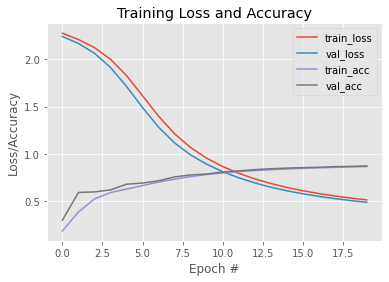

In [46]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])

## Repeat for CIFAR dataset.

## dataset 
CIFAR-10

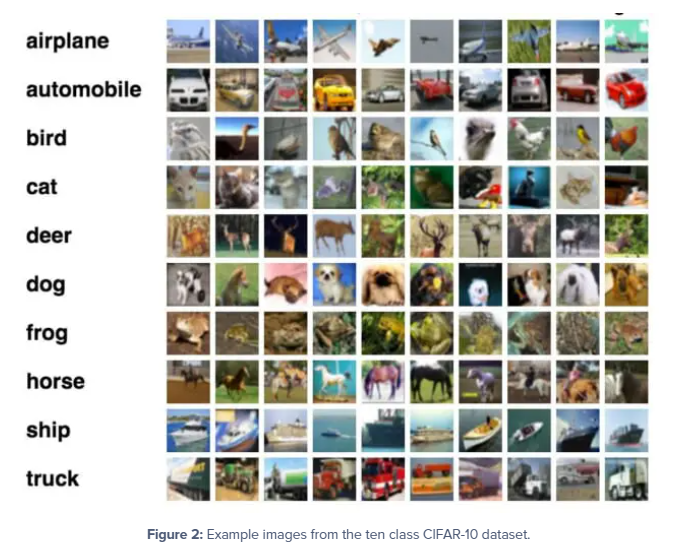

In [47]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [58]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="path to the output loss/accuracy plot")
# args = vars(ap.parse_args())

In [49]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 926s 5us/step


In [50]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

In [51]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________


In [53]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=20, batch_size=32)

[INFO] training network...
Epoch 1/20
1563/1563 [==============================] - 85s 50ms/step - loss: 1.8399 - accuracy: 0.3454 - val_loss: 1.6887 - val_accuracy: 0.4063
Epoch 2/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6500 - accuracy: 0.4147 - val_loss: 1.6490 - val_accuracy: 0.4100
Epoch 3/20
1563/1563 [==============================] - 83s 53ms/step - loss: 1.5706 - accuracy: 0.4430 - val_loss: 1.5696 - val_accuracy: 0.4381
Epoch 4/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5108 - accuracy: 0.4673 - val_loss: 1.4962 - val_accuracy: 0.4758
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4653 - accuracy: 0.4821 - val_loss: 1.5185 - val_accuracy: 0.4578
Epoch 6/20
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4232 - accuracy: 0.4981 - val_loss: 1.5390 - val_accuracy: 0.4450
Epoch 7/20
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3902 - accuracy: 

In [54]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

[INFO] evaluating network...
313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

    airplane       0.64      0.51      0.57      1000
  automobile       0.68      0.58      0.62      1000
        bird       0.44      0.39      0.41      1000
         cat       0.40      0.34      0.37      1000
        deer       0.39      0.60      0.47      1000
         dog       0.52      0.38      0.44      1000
        frog       0.52      0.66      0.58      1000
       horse       0.67      0.55      0.60      1000
        ship       0.45      0.82      0.58      1000
       truck       0.74      0.32      0.45      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



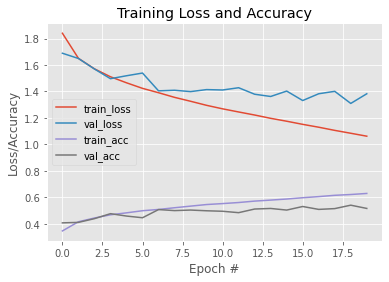

In [57]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])